In [152]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


TASK 1 clean up the data
TASK 2  are there is any missing values
TASK 3 standarize category in REGION
TASK 4 standarize SEX into two categories MALE FEMALE
TASK 5 change SMOKER column to boolean values
TASK 6 standarize CHARGES data type(float)

In [153]:
insurance_filled = insurance.dropna()

insurance_filled['region'] = insurance_filled['region'].str.lower()

FEMALE = 'female'
MALE = 'male'
sex_map = {'F': FEMALE, 'woman': FEMALE, 'man': MALE, 'M': MALE}

insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)

insurance_filled['smoker'] = (insurance_filled['smoker'] == 'yes')

insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype('float64')

insurance_pos = insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

insurance_pos.sample(10)

C:\Users\nayee\AppData\Local\Temp\ipykernel_16360\2850888025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region'] = insurance_filled['region'].str.lower()
C:\Users\nayee\AppData\Local\Temp\ipykernel_16360\2850888025.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)
C:\Users\nayee\AppData\Local\Temp\ipykernel_16360\2850888025.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,age,sex,bmi,children,smoker,region,charges
1017,26.0,female,34.200,2.0,False,southwest,3987.92600
792,22.0,female,23.180,0.0,False,northeast,2731.91220
953,44.0,male,30.200,2.0,True,southwest,38998.54600
1178,23.0,female,34.865,0.0,False,northeast,2899.48935
371,57.0,female,22.230,0.0,False,northeast,12029.28670
1219,38.0,female,30.210,3.0,False,northwest,7537.16390
181,18.0,female,38.280,0.0,False,southeast,1631.82120
821,26.0,male,17.670,0.0,False,northwest,2680.94930
1039,19.0,male,27.265,2.0,False,northwest,22493.65964
108,29.0,male,27.940,0.0,False,southeast,2867.11960


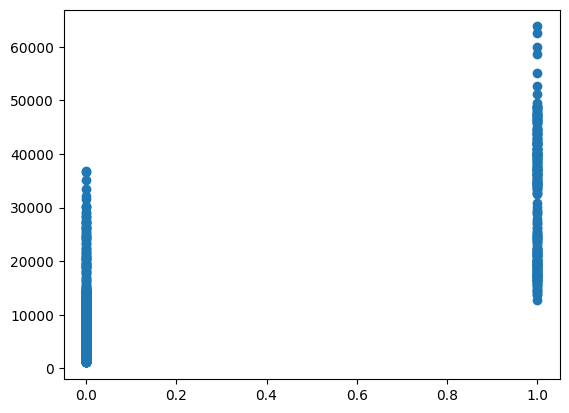

In [154]:
import matplotlib.pyplot as plt

# Task #2: Scatterplots of relationships between variables & charges
df = insurance_pos.copy()

plt.scatter(df['smoker'], df['charges'])

In [155]:
# Task #3 - Prepare the data for a model fitting

df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
df_new = df_new.drop(columns=['region_southeast'])

df_new['smoker'] = df_new['smoker'].astype('int64')

df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
df_new = df_new.drop(columns=['sex'])

df_new = df_new.dropna()
df_new.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,False,False,True,0
1,18.0,33.770,1.0,0,1725.55230,False,False,False,1
2,28.0,33.000,3.0,0,4449.46200,False,False,False,1
3,33.0,22.705,0.0,0,21984.47061,False,True,False,1
4,32.0,28.880,0.0,0,3866.85520,False,True,False,1


In [158]:
# Convert boolean columns for regions to 0 and 1
region_columns = ['region_northeast', 'region_northwest', 'region_southwest']

# Convert each region column to integers
df_new[region_columns] = df_new[region_columns].astype(int)

# Display the updated DataFrame
print(df_new.head())


    age     bmi  children  smoker      charges  region_northeast  \
0  19.0  27.900       0.0       1  16884.92400                 0   
1  18.0  33.770       1.0       0   1725.55230                 0   
2  28.0  33.000       3.0       0   4449.46200                 0   
3  33.0  22.705       0.0       0  21984.47061                 0   
4  32.0  28.880       0.0       0   3866.85520                 0   

   region_northwest  region_southwest  is_male  
0                 0                 1        0  
1                 0                 0        1  
2                 0                 0        1  
3                 1                 0        1  
4                 1                 0        1  


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score    

# Define input and output variables
X = df_new.drop(columns=['charges'])
y = df_new['charges']

print(df_new.info())
print(y.info())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R squared score
r2_score = r2_score(y_test, y_pred)

# Output the mean squared error
r2_score


<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   float64
 1   bmi               1207 non-null   float64
 2   children          1207 non-null   float64
 3   smoker            1207 non-null   int64  
 4   charges           1207 non-null   float64
 5   region_northeast  1207 non-null   int32  
 6   region_northwest  1207 non-null   int32  
 7   region_southwest  1207 non-null   int32  
 8   is_male           1207 non-null   int64  
dtypes: float64(4), int32(3), int64(2)
memory usage: 80.2 KB
None
<class 'pandas.core.series.Series'>
Index: 1207 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1207 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB
None


0.7049323160872817

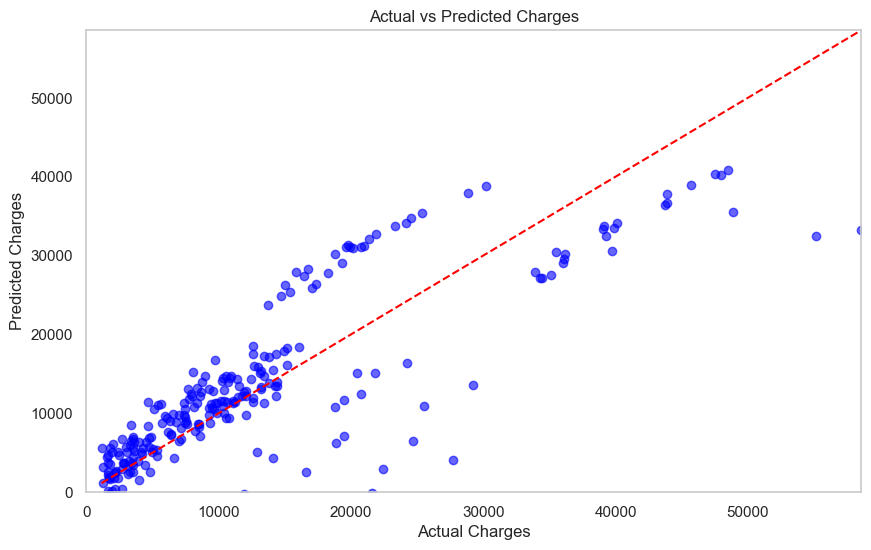

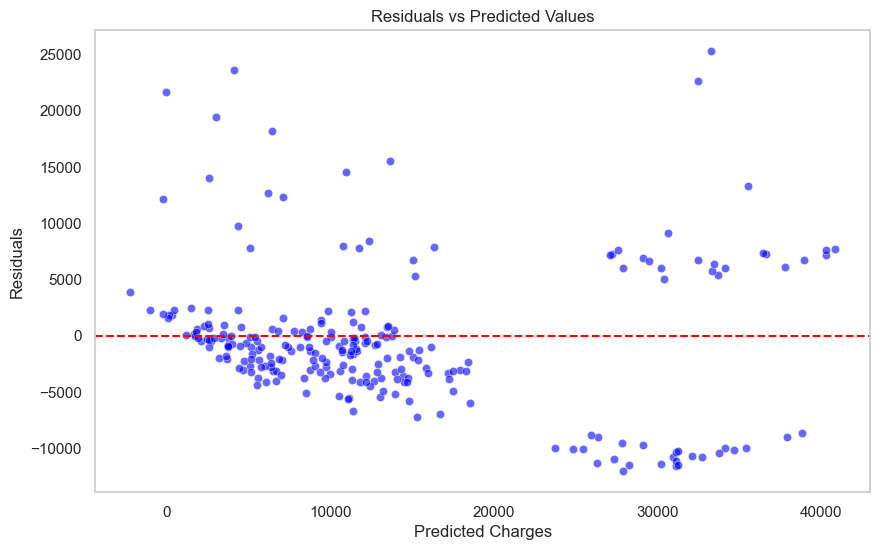

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.xlim([0, max(y_test.max(), y_pred.max())])
plt.ylim([0, max(y_test.max(), y_pred.max())])
plt.grid()
plt.show()

# Optionally, you can create a residual plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.grid()
plt.show()


In [162]:
def preprocess_df(df):
    df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
    df_new = df_new.drop(columns=['region_southeast'])

    df_new['smoker'] = (df_new['smoker'] == 'yes')
    df_new['smoker'] = df_new['smoker'].astype('int64')

    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
    df_new = df_new.drop(columns=['sex'])
    
    return df_new

In [164]:
val_df = pd.read_csv('validation_dataset.csv')
input_df = preprocess_df(val_df)

predictions = model.predict(input_df)

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
